## Importância das features

## Métodos:
1. Recursive feature elimination
2. Correlação
3. Seleção baseada em clustering

In [1]:
#importando os modulos
import sys
sys.path.append('euthyroid_sick_syndrome')
from utils import *
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
import numpy as np
from sklearn.model_selection import GridSearchCV


In [2]:
#Carregando o dataset
dataset = pd.read_csv('/home/vinicius/UFERSA/cilab/euthyroid_sick_syndrome/euthyroid_sick_syndrome/datasets/euthyroid/euthyroid_final_features.csv')
output_label_dataset = dataset['classification']
dataset = dataset.drop(['classification'], axis=1)

#Balanceando dos dados 
dataset_res, ouput_label = balance_dataset_smote(dataset, output_label_dataset, random_state=42, k_neighbors=5)

#Dividindo o dataset em treino e teste
#80 % para treino e 20% para teste
input_train, input_test, output_train, output_test = slipt_and_standardize_dataset(dataset=dataset_res, output_label=ouput_label)

## RFE Recursive feature elimination

importância das features: 
 [8.07908296e-02 6.72181818e-03 2.58383577e-02 8.53132752e-04
 1.36628541e-04 1.09023423e-03 9.23802402e-03 6.49795530e-03
 1.87212892e-04 6.31661699e-04 1.18340934e-04 1.63337656e-06
 2.02058453e-03 8.83301341e-02 5.46409483e-01 6.16145045e-02
 9.92996672e-02 7.02197976e-02]
Coluna: 0, Selecionado True, Rank: 1.000
Coluna: 1, Selecionado False, Rank: 5.000
Coluna: 2, Selecionado False, Rank: 3.000
Coluna: 3, Selecionado False, Rank: 9.000
Coluna: 4, Selecionado False, Rank: 13.000
Coluna: 5, Selecionado False, Rank: 8.000
Coluna: 6, Selecionado False, Rank: 4.000
Coluna: 7, Selecionado False, Rank: 6.000
Coluna: 8, Selecionado False, Rank: 11.000
Coluna: 9, Selecionado False, Rank: 10.000
Coluna: 10, Selecionado False, Rank: 12.000
Coluna: 11, Selecionado False, Rank: 14.000
Coluna: 12, Selecionado False, Rank: 7.000
Coluna: 13, Selecionado True, Rank: 1.000
Coluna: 14, Selecionado True, Rank: 1.000
Coluna: 15, Selecionado False, Rank: 2.000
Coluna: 16, Sele

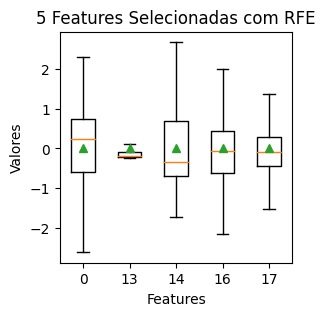

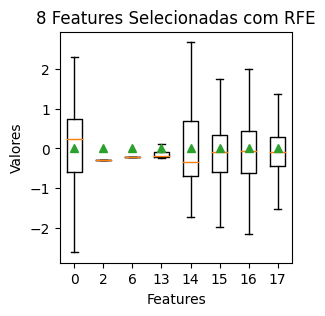

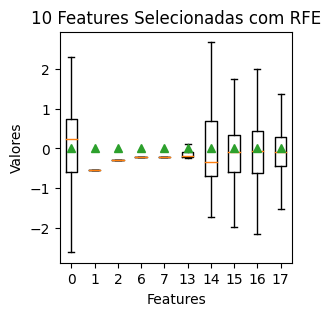

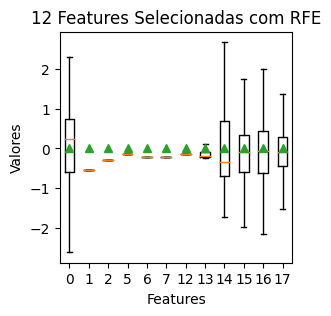

In [3]:
#Selecionando features Usando RFE (Recursive feature elimination)

model = RandomForestClassifier(bootstrap=False, criterion='log_loss', max_depth=26,
max_features='sqrt', min_samples_split=40, n_estimators=100)
model.fit(input_train, output_train)
'''
param_grid = {'criterion': ['gini', 'entropy', 'log_loss'], 
        'max_features': ['sqrt', 'log2'],
        'bootstrap': [True, False],
        'max_depth': np.arange(10, 30, 5),
        'n_estimators': [10, 30, 50, 100],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]}

model = GridSearchCV(estimator = model, param_grid = param_grid)
model.fit(input_train, output_train)
print(model.best_params_)
'''

print("importância das features: \n", model.feature_importances_)

# Definir o RFE com 3 recursos a serem selecionados, ou seja ele está selecionando as 3 melhores features
for j in [5, 8, 10, 12]:
    rfe = RFE(estimator=model, n_features_to_select=j)

    # Executar o RFE no conjunto de treinamento
    rfe.fit(input_train, output_train)

    # Verificando os recursos selecionados
    for i in range(input_train.shape[1]):
        print('Coluna: %d, Selecionado %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

    #mostrando as features selecionadas
    selected_features_indices = [i for i, selected in enumerate(rfe.support_) if selected]
    selected_features_ranks = [rfe.ranking_[i] for i in selected_features_indices]

    # Selecionar os recursos do conjunto de treinamento e teste
    input_train_rfe = rfe.transform(input_train)
    X_test_rfe = rfe.transform(input_test)

    # Criando um novo modelo com os recursos selecionados
    model.fit(input_train_rfe, output_train)

    # Avaliando a acuracia do modelo no conjunto de teste
    y_pred = model.predict(X_test_rfe)

    accuracy(output_test, y_pred)

    plt.figure(figsize=(3, 3))
    plt.boxplot(input_train_rfe, labels=selected_features_indices, showmeans=True, showfliers=False)
    plt.title('{} Features Selecionadas com RFE'.format(j))
    plt.xlabel('Features')
    plt.ylabel('Valores')
    plt.savefig('RFE_{}.png'.format(j), dpi=300, bbox_inches='tight')

Este método remove recursivamente as features menos importantes de um conjunto completo de features até que o desempenho do modelo pare de melhorar. Ele usa um modelo de aprendizado de máquina para avaliar o desempenho do modelo após a remoção de cada feature.
Neste método foi usado o Random Forest para selecionar as features mais importantes. Ele treina várias árvores aleatorias com todas as features disponíveis e, em seguida, usa a importância relativa das features para selecionar as mais importantes.


## Resultados

### Com ajuste

5 features ['age', 'TSH', 'T3', 'T4U', 'FTI']

8 features ['age', 'on_thyroxine', 'query_hypothyroid', 'TSH', 'T3', 'TT4', 'T4U',
'FTI']

10 features ['age', 'sex', 'on_thyroxine', 'query_hypothyroid', 'query_hyperthyroid',
'TSH', 'T3', 'TT4', 'T4U', 'FTI']

12 features ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'query_hypothyroid',
'query_hyperthyroid', 'goitre', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

---

### Sem ajuste

5 features ['age', 'TSH', 'T3', 'TT4', 'T4U']

8 features ['age', 'on_thyroxine', 'query_hypothyroid', 'TSH', 'T3', 'TT4', 'T4U',
'FTI']

10 features ['age', 'sex', 'on_thyroxine', 'query_hypothyroid', 'query_hyperthyroid',
'TSH', 'T3', 'TT4', 'T4U', 'FTI']

12 features ['age', 'sex', 'on_thyroxine', 'thyroid_surgery', 'query_hypothyroid',
'query_hyperthyroid', 'sick', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']


## Correlação

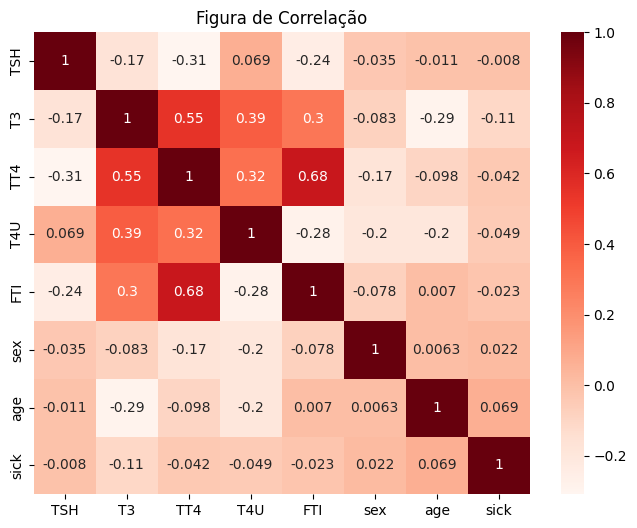

In [7]:
plt.figure(figsize=(8,6))
cor = dataset[['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'sex', 'age', 'sick']].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.title('Figura de Correlação')
plt.savefig('Correlacao.png', dpi=300, bbox_inches='tight')

Este método seleciona as features que têm alta correlação com a variável de saída. Ele usa uma matriz de correlação para identificar as features mais importantes.

## Seleção baseada em clustering

In [5]:
# Criando clusters usando KMeans
list_num_clusters = [3, 5, 8, 10, 12]
for num_clusters in list_num_clusters:
    kmeans = KMeans(n_clusters = num_clusters, random_state = 42)
    kmeans.fit(input_train)
    print(f'{num_clusters} Clusters: ')

    # Selecionando recursos importantes usando LassoCV
    list_num_features = [2, 3, 5, 8, 10, 12]
    for num_features in list_num_features:
        lasso = LassoCV(cv=5)
        selection = SelectFromModel(estimator=lasso, threshold=-np.inf, max_features = num_features)
        selection.fit(input_train, kmeans.labels_)
        selected_features = selection.get_support(indices=True)

        print(f'{num_features} Features selecionadas:')
        for feature_index in selected_features:
            print(dataset.columns[feature_index])
        print()

# Imprimindo os recursos selecionados
# print("Recursos selecionados: ", dataset.columns[selected_features])


# principais features RFE: idade, TSH, T3, T4U, FTI
# principais features correlação: FTI, TT4, T4U, T3


# principais features clustering: 'TSH' aparece 20 vezes, 'sex' aparece 19 vezes,  'age' aparece 14 vezes, 
# 'on_thyroxine' aparece 14 vezes, 'query_hypothyroid' aparece 14 vezes,  'lithium' aparece 14 vezes, 'T3' aparece 14 vezes, 
# 'pregnant' aparece 13 vezes, 'TT4' aparece 13 vezes, 'sick' aparece 12 vezes, 'on_antithyroid_medication' aparece 9 vezes, 
# 'query_on_thyroxine' aparece 8 vezes, 'T4U' aparece 8 vezes, 'thyroid_surgery' aparece 5 vezes, 'query_hyperthyroid' aparece 5 vezes, 
# 'tumor' aparece 0 vezes, 'goitre' aparece 0 vezes, 'FTI' aparece 0 vezes, 

/home/vinicius/UFERSA/cilab/euthyroid_sick_syndrome/cilab/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3 Clusters: 
2 Features selecionadas:
on_thyroxine
T3

3 Features selecionadas:
age
on_thyroxine
T3

5 Features selecionadas:
age
on_thyroxine
query_hyperthyroid
T3
TT4

8 Features selecionadas:
age
on_thyroxine
query_hyperthyroid
goitre
T3
TT4
T4U
FTI

10 Features selecionadas:
age
sex
on_thyroxine
thyroid_surgery
query_hyperthyroid
goitre
T3
TT4
T4U
FTI

12 Features selecionadas:
age
sex
on_thyroxine
on_antithyroid_medication
thyroid_surgery
query_hypothyroid
query_hyperthyroid
goitre
T3
TT4
T4U
FTI



/home/vinicius/UFERSA/cilab/euthyroid_sick_syndrome/cilab/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


5 Clusters: 
2 Features selecionadas:
tumor
goitre

3 Features selecionadas:
tumor
goitre
T3

5 Features selecionadas:
on_thyroxine
on_antithyroid_medication
tumor
goitre
T3

8 Features selecionadas:
age
on_thyroxine
on_antithyroid_medication
tumor
goitre
T3
TT4
T4U

10 Features selecionadas:
age
on_thyroxine
on_antithyroid_medication
query_hyperthyroid
tumor
goitre
T3
TT4
T4U
FTI

12 Features selecionadas:
age
on_thyroxine
on_antithyroid_medication
thyroid_surgery
query_hypothyroid
query_hyperthyroid
tumor
goitre
T3
TT4
T4U
FTI



/home/vinicius/UFERSA/cilab/euthyroid_sick_syndrome/cilab/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


8 Clusters: 
2 Features selecionadas:
sick
T3

3 Features selecionadas:
query_on_thyroxine
sick
T3

5 Features selecionadas:
age
on_thyroxine
query_on_thyroxine
sick
T3

8 Features selecionadas:
age
on_thyroxine
query_on_thyroxine
sick
T3
TT4
T4U
FTI

10 Features selecionadas:
age
on_thyroxine
query_on_thyroxine
thyroid_surgery
query_hyperthyroid
sick
T3
TT4
T4U
FTI

12 Features selecionadas:
age
on_thyroxine
query_on_thyroxine
thyroid_surgery
query_hyperthyroid
sick
tumor
goitre
T3
TT4
T4U
FTI



/home/vinicius/UFERSA/cilab/euthyroid_sick_syndrome/cilab/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


10 Clusters: 
2 Features selecionadas:
sex
query_on_thyroxine

3 Features selecionadas:
sex
query_on_thyroxine
tumor

5 Features selecionadas:
sex
query_on_thyroxine
sick
tumor
T4U

8 Features selecionadas:
age
sex
query_on_thyroxine
on_antithyroid_medication
sick
tumor
T3
T4U

10 Features selecionadas:
age
sex
on_thyroxine
query_on_thyroxine
on_antithyroid_medication
sick
tumor
T3
TT4
T4U

12 Features selecionadas:
age
sex
on_thyroxine
query_on_thyroxine
on_antithyroid_medication
query_hypothyroid
pregnant
sick
tumor
T3
TT4
T4U



/home/vinicius/UFERSA/cilab/euthyroid_sick_syndrome/cilab/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


12 Clusters: 
2 Features selecionadas:
sex
query_hyperthyroid

3 Features selecionadas:
sex
thyroid_surgery
query_hyperthyroid

5 Features selecionadas:
sex
thyroid_surgery
query_hyperthyroid
pregnant
goitre

8 Features selecionadas:
sex
on_thyroxine
query_on_thyroxine
thyroid_surgery
query_hyperthyroid
pregnant
sick
goitre

10 Features selecionadas:
sex
on_thyroxine
query_on_thyroxine
thyroid_surgery
query_hypothyroid
query_hyperthyroid
pregnant
sick
goitre
TT4

12 Features selecionadas:
sex
on_thyroxine
query_on_thyroxine
on_antithyroid_medication
thyroid_surgery
query_hypothyroid
query_hyperthyroid
pregnant
sick
goitre
TT4
FTI



Este método agrupa as features em clusters e seleciona as features mais importantes de cada cluster. Ele usa algoritmos de clustering para agrupar as features.

## Resultados


### 3 clusters 

* 2 features: [sex, TSH]

* 3 features: [classification, sex, TSH]

* 5 features: [classification, sex, query_hypothyroid, TSH, T3]

* 8 features: [classification, sex, query_hypothyroid, lithium, TSH, T3, TT4, T4U]

* 10 features: [classification, age, sex, on_antithyroid_medication, query_hypothyroid, lithium, TSH, T3, TT4, T4U]

* 12 features: [classification, age, sex, query_on_thyroxine, on_antithyroid_medication, thyroid_surgery, query_hypothyroid, lithium, TSH, T3, TT4, T4U]

### 5 clusters 

* 2 features: [sick, lithium]

* 3 features: [sick, lithium, TSH]

* 5 features: [sex, query_on_thyroxine, sick, lithium, TSH]

* 8 features: [classification, sex, query_on_thyroxine, sick, lithium, TSH, T3, TT4]

* 10 features: [classification, sex, query_on_thyroxine, query_hypothyroid, sick, lithium, TSH, T3, TT4, T4U]

* 12 features: [classification, sex, query_on_thyroxine, on_antithyroid_medication, thyroid_surgery, query_hypothyroid, sick, lithium, TSH, T3, TT4, T4U]

### 8 clusters 

* 2 features: [pregnant, TSH]

* 3 features: [on_thyroxine, pregnant, TSH]

* 5 features: [classification, sex, on_thyroxine, pregnant, TSH]

* 8 features: [classification, sex, on_thyroxine, pregnant, TSH, T3, TT4, T4U]

* 10 features: [classification, sex, on_thyroxine, on_antithyroid_medication, query_hypothyroid, pregnant, TSH, T3, TT4, T4U]

* 12 features: [classification, sex, on_thyroxine, on_antithyroid_medication, query_hypothyroid, pregnant, sick, lithium, TSH, T3, TT4]

### 10 clusters

* 2 features: [age, on_thyroxine]

* 3 features: [age, on_thyroxine, sick]

* 5 features: [age, on_thyroxine, pregnant, sick, TT4]

* 8 features: [classification, age, on_thyroxine, query_on_thyroxine, pregnant, sick, TSH, TT4]

* 10 features: [classification, age, sex, on_thyroxine, query_on_thyroxine, pregnant, sick, TSH, T3, TT4]

* 12 features: [classification, age, sex, on_thyroxine, query_on_thyroxine, thyroid_surgery, query_hyperthyroid, pregnant, sick, TSH, T3, TT4]

### 12 clusters

* 2 features: [age, query_hypothyroid]

* 3 features: [age, on_antithyroid_medication, query_hypothyroid]

* 5 features: [age, on_antithyroid_medication, query_hypothyroid, query_hyperthyroid, lithium]

* 8 features: [age, sex, on_thyroxine, on_antithyroid_medication, query_hypothyroid, query_hyperthyroid, pregnant, lithium]

* 10 features: [age, sex, on_thyroxine, on_antithyroid_medication, thyroid_surgery, query_hypothyroid, query_hyperthyroid, pregnant, lithium, T3]

* 12 features: [age, sex, on_thyroxine, query_on_thyroxine,on_antithyroid_medication, thyroid_surgery, query_hypothyroid, query_hyperthyroid, pregnant, lithium, T3, T4U]

In [6]:
colunas = dataset.columns
print("Colunas:")
print(colunas)

# Exibir as cinco primeiras linhas
cinco_primeiras_linhas = dataset.head(5)
print("\nCinco primeiras linhas:")
print(cinco_primeiras_linhas)


Colunas:
Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH', 'T3', 'TT4', 'T4U', 'FTI'],
      dtype='object')

Cinco primeiras linhas:
   age  sex  on_thyroxine  query_on_thyroxine  on_antithyroid_medication  \
0   45    0             0                   0                          0   
1   64    0             0                   0                          0   
2   56    1             0                   0                          0   
3   78    0             1                   0                          0   
4   80    1             0                   0                          0   

   thyroid_surgery  query_hypothyroid  query_hyperthyroid  pregnant  sick  \
0                0                  0                   0         0     0   
1                0                  0                   0         0     1   


In [7]:
# Exibir os nomes das colunas
print(dataset.columns)

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH', 'T3', 'TT4', 'T4U', 'FTI'],
      dtype='object')


In [8]:
# from tabulate import tabulate

# # columns_to_select = ['classification', 'age', 'sex', 'sick', 'tumor', 'lithium', 'goitre', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
# # selected_dataset = dataset[columns_to_select]

# # # Exibir as colunas
# # colunas = selected_dataset.columns.tolist()
# # print(colunas)

# # Exibir as cinco primeiras linhas
# s_linhas = dataset[['classification', 'age', 'sex', 'sick', 'tumor', 'lithium', 'goitre', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']].head(5)

# dados = s_linhas.values.tolist()

# tabela = tabulate(dados, headers=colunas, tablefmt="latex", numalign="center")

# caption = "First 5 rows of the database."
# label = "tb1"

# table = "\\begin{table}[!htb]\n"
# table += "\\caption{" + caption + "}\n"
# table += "\\label{" + label + "}\n"
# table += "\\begin{tabular}{|l|l|l|l|l|l|l|l|l|l|l|l|}\n"
# table += "\\hline\n"
# table += "\\multicolumn{1}{|c|}{Classification} & \\multicolumn{1}{c|}{Age} & \\multicolumn{1}{c|}{Sex} & \\multicolumn{1}{c|}{Sick} & \\multicolumn{1}{c|}{TSH} & \\multicolumn{1}{c|}{T3} & \\multicolumn{1}{c|}{Total T4} & \\multicolumn{1}{c|}{T4} & \\multicolumn{1}{c|}{FTI} & \\multicolumn{1}{c|}{Col10} & \\multicolumn{1}{c|}{Col11} & \\multicolumn{1}{c|}{Col12} \\\\ \\hline\n"
# table += tabela + "\n"
# table += "\\hline\n"
# table += "\\end{tabular}\n"
# table += "\\end{table}"

# print(table)


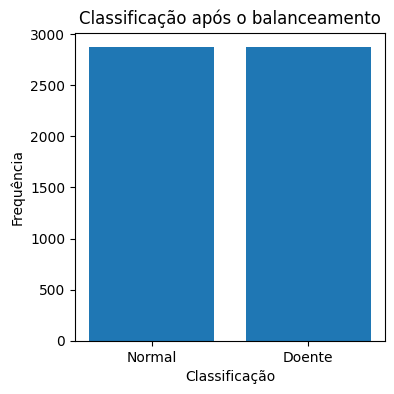

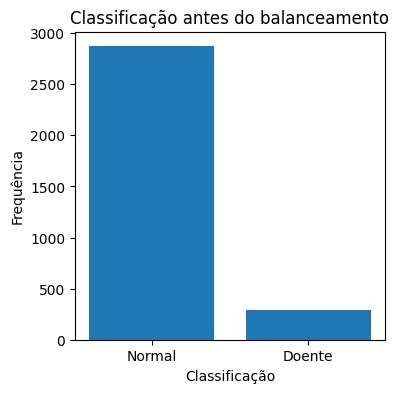

In [5]:
dataset = pd.read_csv('/home/vinicius/UFERSA/cilab/euthyroid_sick_syndrome/euthyroid_sick_syndrome/datasets/euthyroid/euthyroid_final_features.csv')
#Balanceando dos dados 
dataset_bal, ouput_label = balance_dataset_smote(dataset, output_label_dataset, random_state=42, k_neighbors=5)
output_label_dataset_bal = dataset_bal['classification']

output_label_dataset_des = dataset['classification']


# Função para criar o gráfico
def plot_grafico_barras(dados, title, check):
    labels = ['Normal', 'Doente']
    count_0 = len(dados[dados == 0])
    count_1 = len(dados[dados == 1])
    contagem = [count_0, count_1]

    plt.figure(figsize=(4, 4))
    plt.bar(labels, contagem)
    plt.xlabel('Classificação')
    plt.ylabel('Frequência')
    plt.title(title)
    plt.savefig('classification_after_balance.png' if check == 1 else 'classification_before_balance.png', dpi=300)

# Chamar as funções para plotar os gráficos
plot_grafico_barras(output_label_dataset_bal, 'Classificação após o balanceamento', 1)
plot_grafico_barras(output_label_dataset_des, 'Classificação antes do balanceamento', 0)
